In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
Lifesprk_scores= pd.read_excel("C:\\Users\\regin\\Downloads\\scores.xlsx"
                                  )
Lifesprk_scores.head()

member_id  ACG_CHF_IND_CD  ACG_DEPRESSION_MPR  SDOH_FINANCIAL  \
0          0           64.87               37.88           62.62   
1          1           51.73               52.80           51.99   
2          2           53.18               45.77           49.88   
3          3           55.53               49.42           65.97   
4          4           53.76               37.38           63.68   

   SDOH_EDUCATION_LEVEL  SDOH_CRIME_RATES  SDOH_TECH_ACCESS  SDOH_EMPLOYMENT  \
0                 54.81             22.95             21.92            28.97   
1                 66.49             24.82             28.74            30.64   
2                 57.47             25.29             23.52            28.53   
3                 63.64             23.67             30.51            29.28   
4                 52.51             22.89             28.80            29.43   

   ACG_CHRONIC_CONDITION_COUNT  SDOH_ACTIVIY_LEVEL  SDOH_COMMUNITY  
0                        29.91               68.53           68.39  
1                        42.31               54.88           66.47  
2                        38.78               79.04           62.94  
3                        28.11               72.07           51.57  
4                        34.34               80.53           81.70

In [27]:
Lifesprk_members= pd.read_excel("C:\\Users\\regin\\Downloads\\members.xlsx"
                                  )
Lifesprk_members.head()

member_id  age  gender  zip_code    race               name        dob
0             0  101    male     56016    gold     Randell Cremin 1919-10-21
1             1   90  female     56015  silver   Marge Vandervort 1931-02-20
2             2   92    male     56014  bronze        Burt Maggio 1929-07-13
3             3   72    male     56020  bronze   Julius Gutkowski 1949-04-06
4             4   96    male     56016  bronze  Lenard Morissette 1925-01-18
...         ...  ...     ...       ...     ...                ...        ...
9995       9995   81    male     56015    gold       Jorge Dooley 1940-03-25
9996       9996   84    male     56020  bronze          Heath Orn 1937-02-17
9997       9997   93  female     56016  bronze   Terrie Heathcote 1928-08-11
9998       9998  103  female     56017    gold          Kelly Fay 1918-04-04
9999       9999   71  female     56018    gold   Casandra Shields 1950-02-20

[10000 rows x 7 columns]

In [12]:
Lifesprk_admissions= pd.read_excel("C:\\Users\\regin\\Downloads\\admissions.xlsx"
                                  )
Lifesprk_admissions.head()

member_id  gender admission_date discharge_date  \
0       6891    male     2019-08-21     2019-08-30   
1       7321  female     2019-08-21     2019-09-09   
2       5954    male     2019-08-21     2019-10-04   
3       3904  female     2019-08-21     2019-09-17   
4       9177    male     2019-08-21     2019-08-27   

                           facility  
0          Mizell Memorial Hospital  
1          Mizell Memorial Hospital  
2             Callahan Eye Hospital  
3     Shelby Baptist Medical Center  
4  Southeast Alabama Medical Center

In [51]:
contfactors = pd.merge(Lifesprk_admissions, Lifesprk_scores, how='left',on='member_id')
contfactors=pd.merge(contfactors,Lifesprk_members,how='right',on='gender')
contfactors.head()

member_id_x gender admission_date discharge_date  \
0         6891   male     2019-08-21     2019-08-30   
1         5954   male     2019-08-21     2019-10-04   
2         9177   male     2019-08-21     2019-08-27   
3         4173   male     2019-08-21     2019-09-04   
4         2795   male     2019-08-21     2019-08-29   

                           facility  ACG_CHF_IND_CD  ACG_DEPRESSION_MPR  \
0          Mizell Memorial Hospital           38.75               43.61   
1             Callahan Eye Hospital           46.06               62.10   
2  Southeast Alabama Medical Center           59.53               46.72   
3    Helen Keller Memorial Hospital           40.33               50.74   
4    Helen Keller Memorial Hospital           43.04               32.72   

   SDOH_FINANCIAL  SDOH_EDUCATION_LEVEL  SDOH_CRIME_RATES  ...  \
0           76.72                 50.29             25.75  ...   
1           48.57                 51.51             21.75  ...   
2           57.61                 60.90             18.37  ...   
3           58.71                 56.13             22.67  ...   
4           59.67                 68.74             25.86  ...   

   SDOH_EMPLOYMENT  ACG_CHRONIC_CONDITION_COUNT  SDOH_ACTIVIY_LEVEL  \
0            33.33                        27.46               71.75   
1            31.69                        25.52               57.42   
2            28.17                        41.10               74.04   
3            26.56                        31.15               59.55   
4            28.49                        29.24               48.09   

   SDOH_COMMUNITY  member_id_y  age  zip_code  race            name        dob  
0           66.18            0  101     56016  gold  Randell Cremin 1919-10-21  
1           39.51            0  101     56016  gold  Randell Cremin 1919-10-21  
2           75.67            0  101     56016  gold  Randell Cremin 1919-10-21  
3           85.43            0  101     56016  gold  Randell Cremin 1919-10-21  
4           50.17            0  101     56016  gold  Randell Cremin 1919-10-21  

[5 rows x 21 columns]

In [ ]:
contfactors["admitted"] = contfactors.drop("member_id_x", 1).isin(contfactors["member_id_y"]).any(1)
print(df)

In [50]:
for x in contfactors.member_id:
    if x is in Lifesprk_admissions.member_id:
        print(x)

SyntaxError: invalid syntax (<ipython-input-50-37802d33b2d6>, line 2)

In [35]:
contfactors['admitted']=1
contfactors.head()

member_id  gender admission_date discharge_date  \
0       6891    male     2019-08-21     2019-08-30   
1       7321  female     2019-08-21     2019-09-09   
2       5954    male     2019-08-21     2019-10-04   
3       3904  female     2019-08-21     2019-09-17   
4       9177    male     2019-08-21     2019-08-27   

                           facility  ACG_CHF_IND_CD  ACG_DEPRESSION_MPR  \
0          Mizell Memorial Hospital           38.75               43.61   
1          Mizell Memorial Hospital           56.99               53.90   
2             Callahan Eye Hospital           46.06               62.10   
3     Shelby Baptist Medical Center           58.70               55.07   
4  Southeast Alabama Medical Center           59.53               46.72   

   SDOH_FINANCIAL  SDOH_EDUCATION_LEVEL  SDOH_CRIME_RATES  SDOH_TECH_ACCESS  \
0           76.72                 50.29             25.75             27.04   
1           75.00                 42.90             26.21             23.17   
2           48.57                 51.51             21.75             23.36   
3           82.20                 62.62             23.41             30.01   
4           57.61                 60.90             18.37             25.87   

   SDOH_EMPLOYMENT  ACG_CHRONIC_CONDITION_COUNT  SDOH_ACTIVIY_LEVEL  \
0            33.33                        27.46               71.75   
1            27.99                        43.35               68.66   
2            31.69                        25.52               57.42   
3            26.73                        40.05               50.57   
4            28.17                        41.10               74.04   

   SDOH_COMMUNITY  admitted  
0           66.18         1  
1           67.13         1  
2           39.51         1  
3           65.20         1  
4           75.67         1

In [7]:
ACG_CHF_DEP_CHRC =(contfactors["ACG_CHF_IND_CD"] + contfactors["ACG_DEPRESSION_MPR"] +contfactors['ACG_CHRONIC_CONDITION_COUNT'] ).div(3)
contfactors["ACG_CHF_DEP_CHRC"] = ACG_CHF_DEP_CHRC
SDOH_FCTRS_MID=(contfactors['SDOH_FINANCIAL']+contfactors['SDOH_EDUCATION_LEVEL']+contfactors['SDOH_CRIME_RATES']+contfactors['SDOH_TECH_ACCESS']+contfactors['SDOH_EMPLOYMENT']+contfactors['SDOH_ACTIVIY_LEVEL']+contfactors['SDOH_COMMUNITY']).div(7)
contfactors['SDOH_FCTRS_MID']=SDOH_FCTRS_MID
contfactors.head()


member_id  gender admission_date discharge_date  \
0       6891    male     2019-08-21     2019-08-30   
1       7321  female     2019-08-21     2019-09-09   
2       5954    male     2019-08-21     2019-10-04   
3       3904  female     2019-08-21     2019-09-17   
4       9177    male     2019-08-21     2019-08-27   

                           facility  ACG_CHF_IND_CD  ACG_DEPRESSION_MPR  \
0          Mizell Memorial Hospital           38.75               43.61   
1          Mizell Memorial Hospital           56.99               53.90   
2             Callahan Eye Hospital           46.06               62.10   
3     Shelby Baptist Medical Center           58.70               55.07   
4  Southeast Alabama Medical Center           59.53               46.72   

   SDOH_FINANCIAL  SDOH_EDUCATION_LEVEL  SDOH_CRIME_RATES  SDOH_TECH_ACCESS  \
0           76.72                 50.29             25.75             27.04   
1           75.00                 42.90             26.21             23.17   
2           48.57                 51.51             21.75             23.36   
3           82.20                 62.62             23.41             30.01   
4           57.61                 60.90             18.37             25.87   

   SDOH_EMPLOYMENT  ACG_CHRONIC_CONDITION_COUNT  SDOH_ACTIVIY_LEVEL  \
0            33.33                        27.46               71.75   
1            27.99                        43.35               68.66   
2            31.69                        25.52               57.42   
3            26.73                        40.05               50.57   
4            28.17                        41.10               74.04   

   SDOH_COMMUNITY  ACG_CHF_DEP_CHRC  SDOH_FCTRS_MID  
0           66.18         36.606667       50.151429  
1           67.13         51.413333       47.294286  
2           39.51         44.560000       39.115714  
3           65.20         51.273333       48.677143  
4           75.67         49.116667       48.661429

In [15]:
contributing_factors = pd.merge(Lifesprk_admissions, Lifesprk_scores, how='left', on=['member_id'])
contributing_factors= contributing_factors.drop(columns=['admission_date','discharge_date','facility'])
contributing_factors.head()

member_id  gender  ACG_CHF_IND_CD  ACG_DEPRESSION_MPR  SDOH_FINANCIAL  \
0       6891    male           38.75               43.61           76.72   
1       7321  female           56.99               53.90           75.00   
2       5954    male           46.06               62.10           48.57   
3       3904  female           58.70               55.07           82.20   
4       9177    male           59.53               46.72           57.61   

   SDOH_EDUCATION_LEVEL  SDOH_CRIME_RATES  SDOH_TECH_ACCESS  SDOH_EMPLOYMENT  \
0                 50.29             25.75             27.04            33.33   
1                 42.90             26.21             23.17            27.99   
2                 51.51             21.75             23.36            31.69   
3                 62.62             23.41             30.01            26.73   
4                 60.90             18.37             25.87            28.17   

   ACG_CHRONIC_CONDITION_COUNT  SDOH_ACTIVIY_LEVEL  SDOH_COMMUNITY  
0                        27.46               71.75           66.18  
1                        43.35               68.66           67.13  
2                        25.52               57.42           39.51  
3                        40.05               50.57           65.20  
4                        41.10               74.04           75.67

In [36]:
contributing_factors['admitted']=1
contributing_factors.head()

member_id  gender  ACG_CHF_IND_CD  ACG_DEPRESSION_MPR  SDOH_FINANCIAL  \
0       6891       1           38.75               43.61           76.72   
1       7321       0           56.99               53.90           75.00   
2       5954       1           46.06               62.10           48.57   
3       3904       0           58.70               55.07           82.20   
4       9177       1           59.53               46.72           57.61   

   SDOH_EDUCATION_LEVEL  SDOH_CRIME_RATES  SDOH_TECH_ACCESS  SDOH_EMPLOYMENT  \
0                 50.29             25.75             27.04            33.33   
1                 42.90             26.21             23.17            27.99   
2                 51.51             21.75             23.36            31.69   
3                 62.62             23.41             30.01            26.73   
4                 60.90             18.37             25.87            28.17   

   ACG_CHRONIC_CONDITION_COUNT  SDOH_ACTIVIY_LEVEL  SDOH_COMMUNITY  admitted  
0                        27.46               71.75           66.18         1  
1                        43.35               68.66           67.13         1  
2                        25.52               57.42           39.51         1  
3                        40.05               50.57           65.20         1  
4                        41.10               74.04           75.67         1

In [37]:
def missing_values_table(contributing_factors):
        mis_val = contributing_factors.isnull().sum()
        mis_val_percent = 100 * contributing_factors.isnull().sum() / len(contributing_factors)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(contributing_factors.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

    
missing_values_table(contributing_factors)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le_gender=LabelEncoder()

In [40]:
contributing_factors['gender']=le_gender.fit_transform(contributing_factors['gender'])

In [41]:
contributing_factors.head()

member_id  gender  ACG_CHF_IND_CD  ACG_DEPRESSION_MPR  SDOH_FINANCIAL  \
0       6891       1           38.75               43.61           76.72   
1       7321       0           56.99               53.90           75.00   
2       5954       1           46.06               62.10           48.57   
3       3904       0           58.70               55.07           82.20   
4       9177       1           59.53               46.72           57.61   

   SDOH_EDUCATION_LEVEL  SDOH_CRIME_RATES  SDOH_TECH_ACCESS  SDOH_EMPLOYMENT  \
0                 50.29             25.75             27.04            33.33   
1                 42.90             26.21             23.17            27.99   
2                 51.51             21.75             23.36            31.69   
3                 62.62             23.41             30.01            26.73   
4                 60.90             18.37             25.87            28.17   

   ACG_CHRONIC_CONDITION_COUNT  SDOH_ACTIVIY_LEVEL  SDOH_COMMUNITY  admitted  
0                        27.46               71.75           66.18         1  
1                        43.35               68.66           67.13         1  
2                        25.52               57.42           39.51         1  
3                        40.05               50.57           65.20         1  
4                        41.10               74.04           75.67         1

In [43]:
responsedf=contributing_factors['admitted']
contributing_factors=contributing_factors.drop('admitted',axis='columns')
responsedf.head()

0    1
1    1
2    1
3    1
4    1
Name: admitted, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
contributing_factors_ntrain, contributing_factors_ntest, responsedftrain, responsedftest = train_test_split(contributing_factors, responsedf, test_size=0.2, random_state=1)


In [45]:
from sklearn import tree

# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(contributing_factors_ntrain,responsedftrain)

#Predict the response for test dataset
y_pred = clf.predict(contributing_factors_ntest)

In [46]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(responsedftest, y_pred))


Accuracy: 1.0


In [47]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- class: 0



[Text(1395.0, 1359.0, 'gini = 0.0\nsamples = 3258\nvalue = 3258.0')]

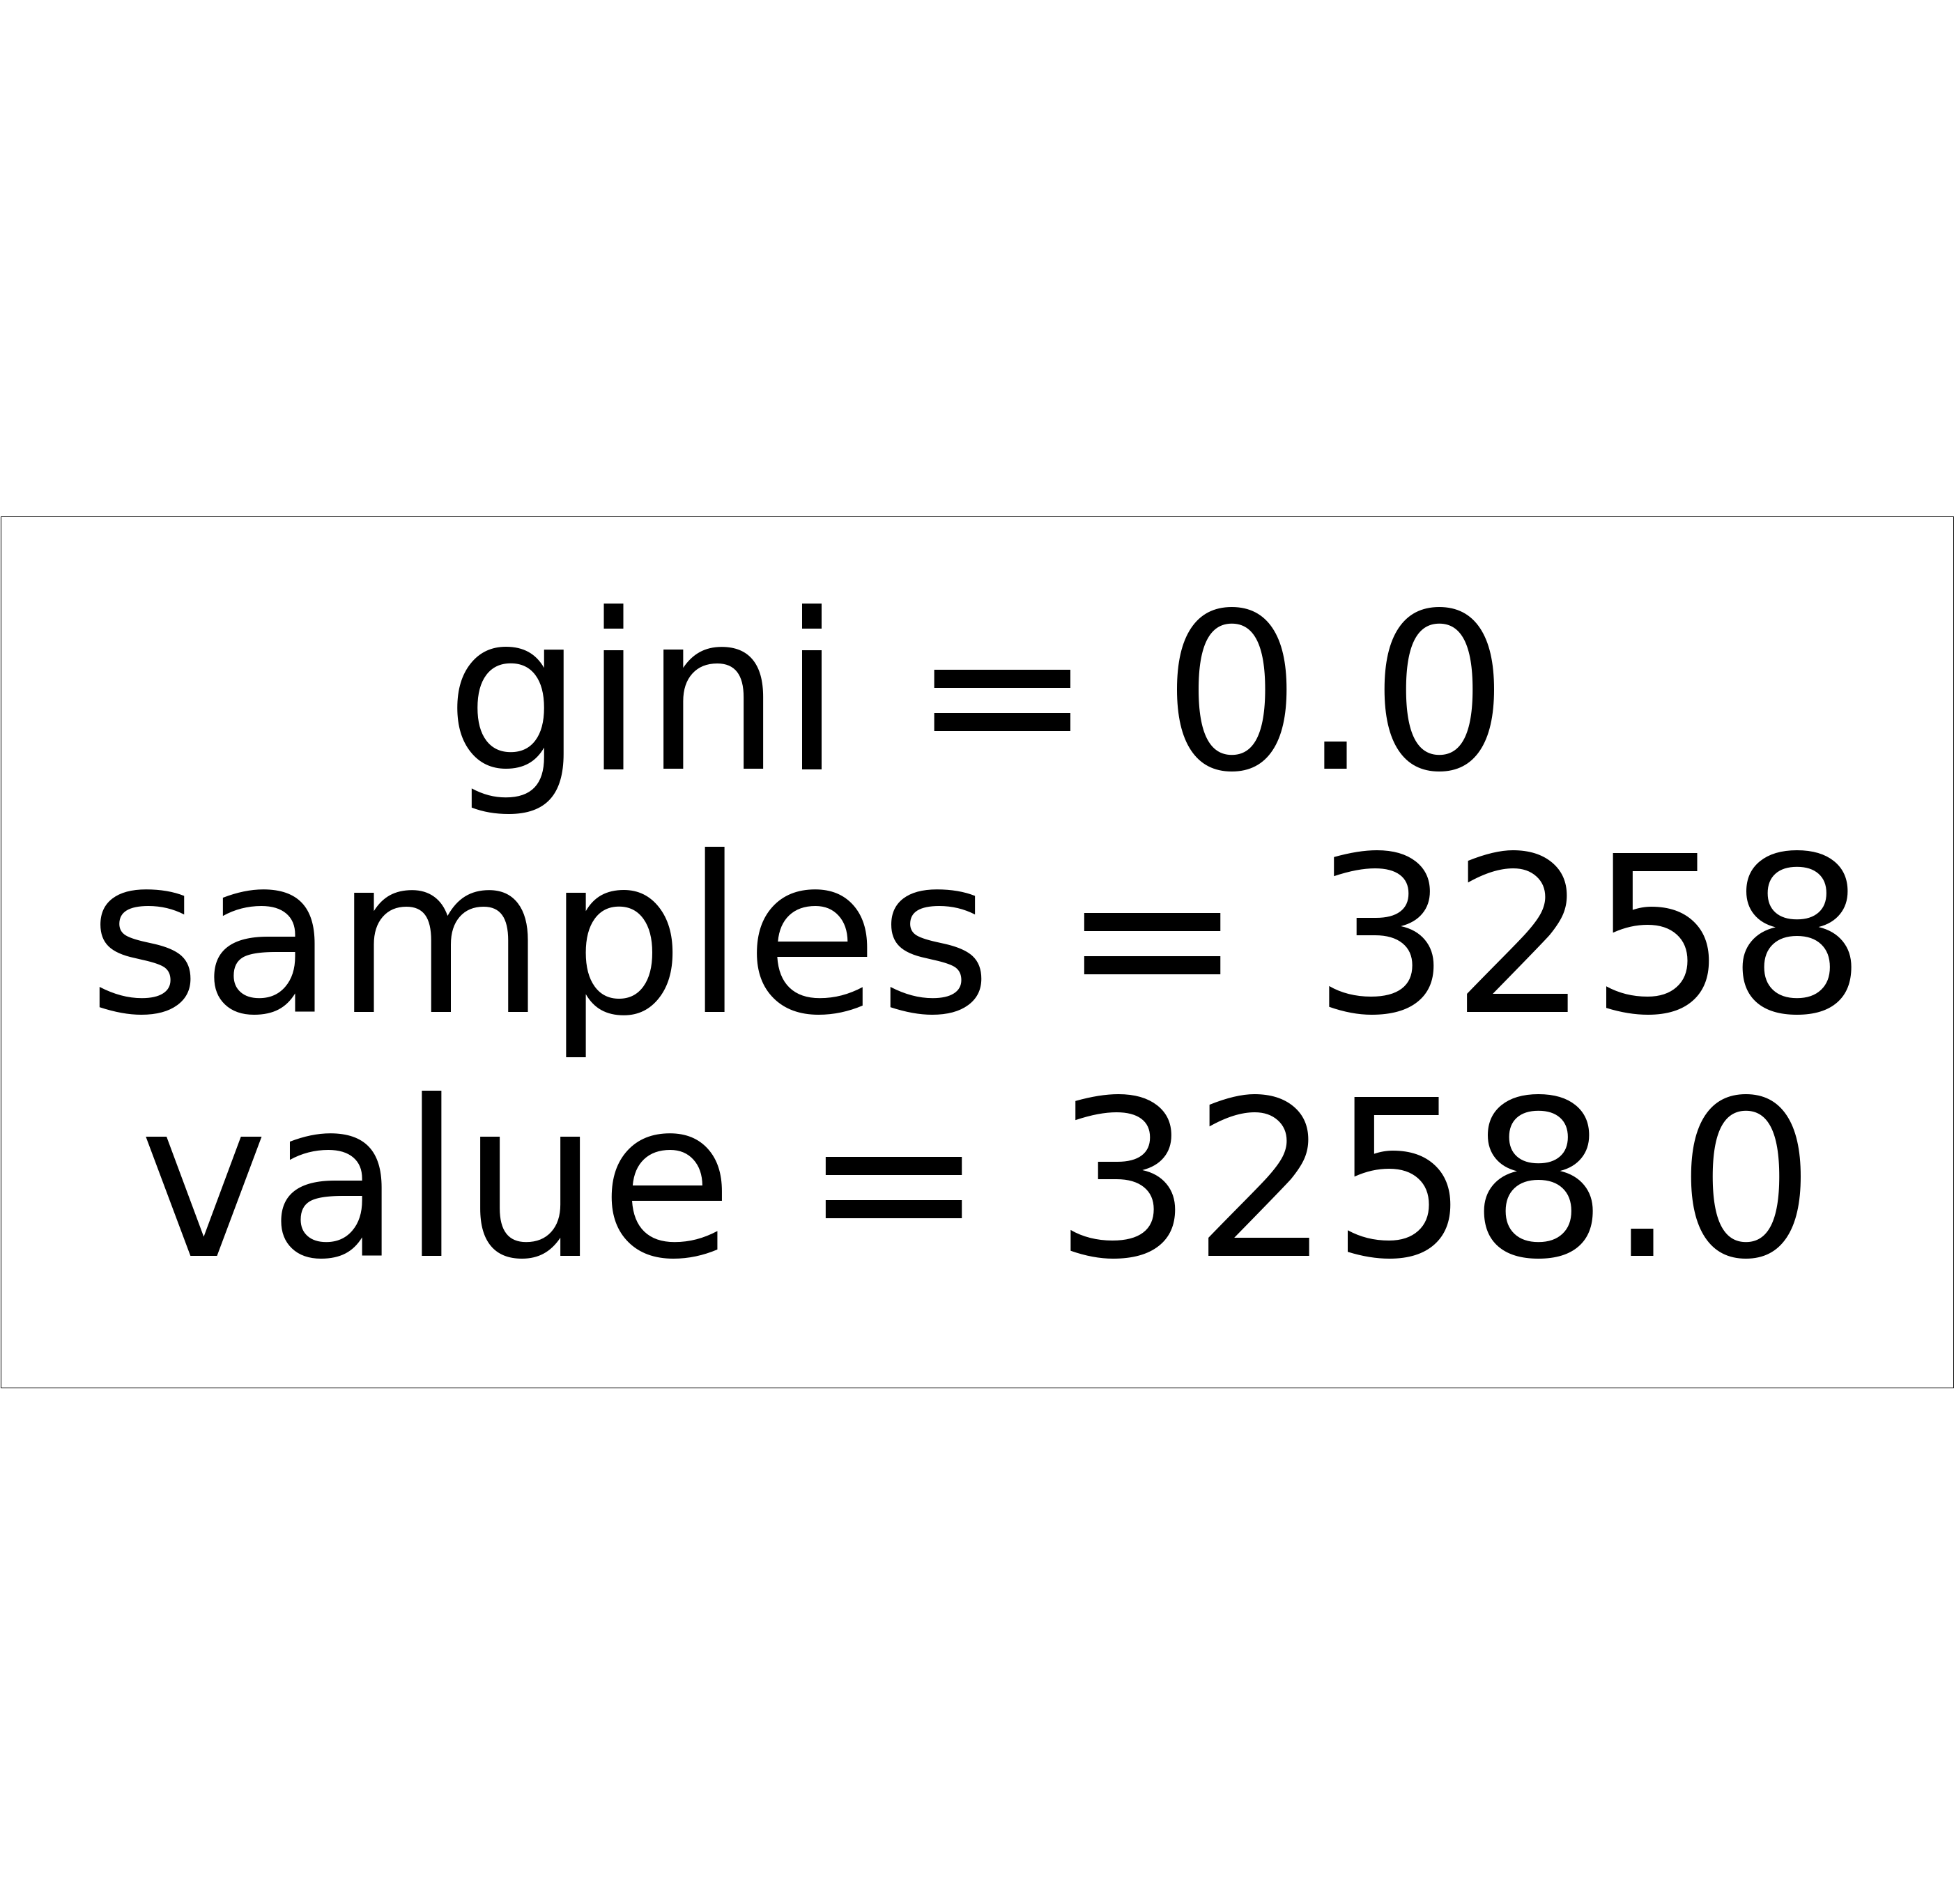

In [48]:
plt.figure(figsize=(50,50))
tree.plot_tree(clf,filled=True)

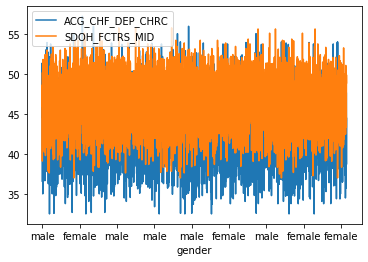

In [75]:
contfactors.plot(y=["ACG_CHF_DEP_CHRC","SDOH_FCTRS_MID"], x='gender')

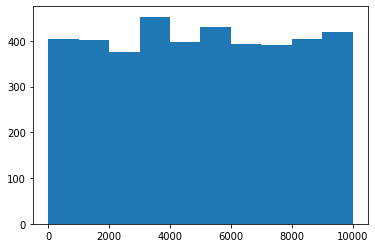

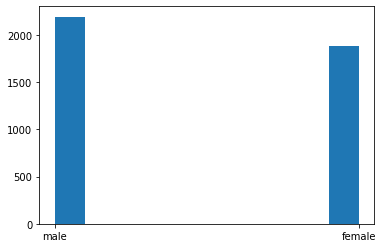

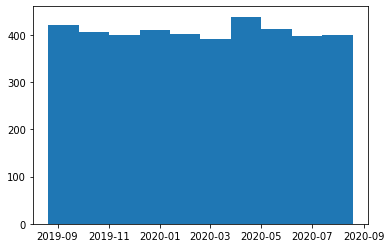

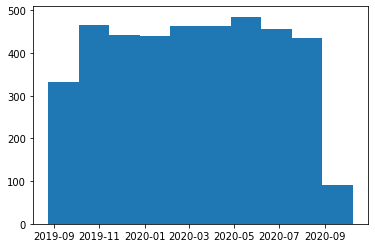

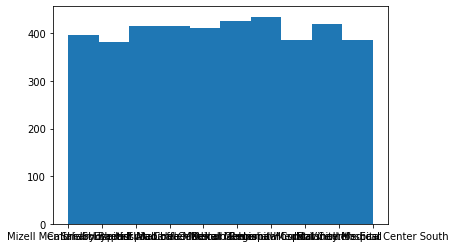

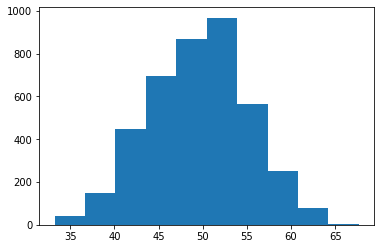

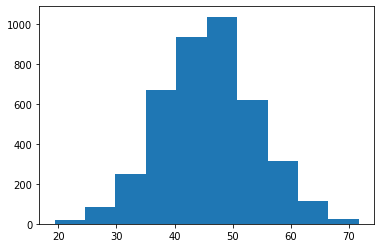

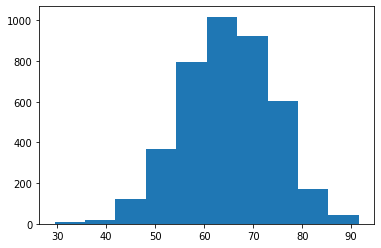

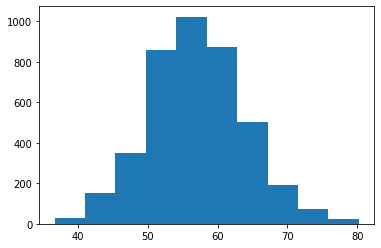

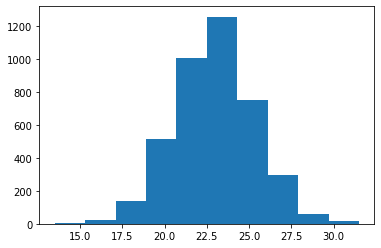

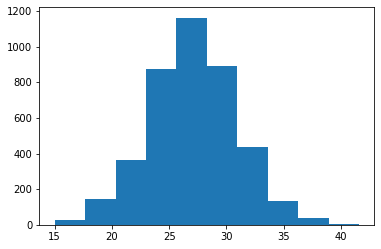

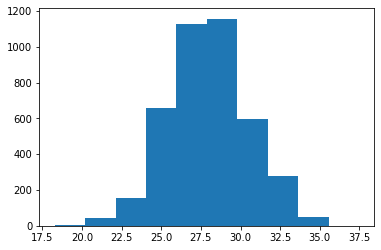

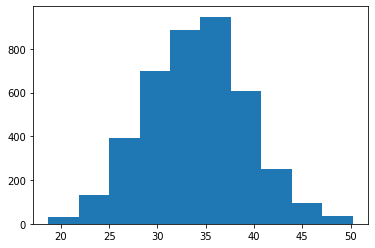

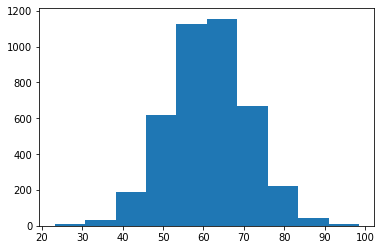

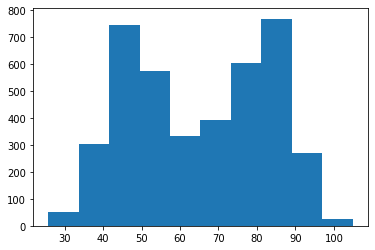

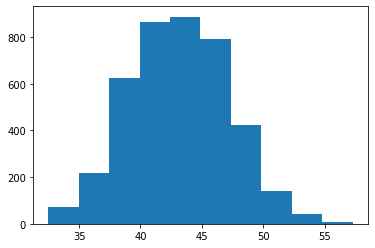

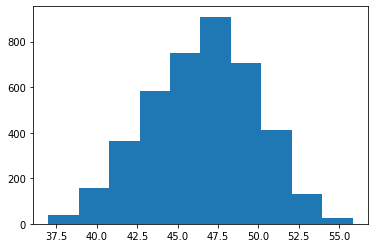

In [45]:
for i in contfactors.columns:
    plt.figure()
    plt.hist(contfactors[i])

C:\Users\regin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



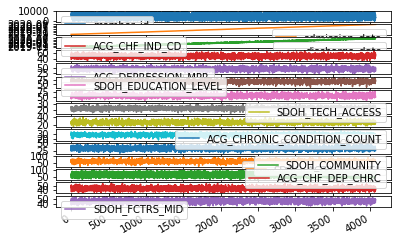

In [39]:
contfactors.plot(subplots=True)

plt.tight_layout()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A31496AD88>,
      dtype=object)

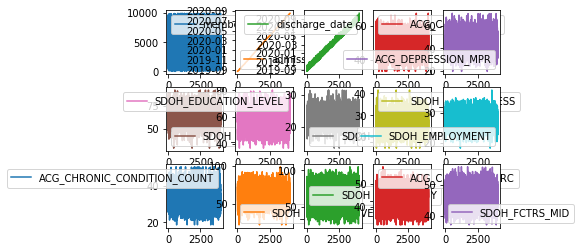

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=5)
contfactors.plot(subplots=True, ax=axes)

In [29]:
fig = px.violin(contfactors, y="ACG_CHF_DEP_CHRC", x="gender", color="gender", box=True, 
          hover_data=contfactors.columns)
fig.show()

In [30]:
fig = px.violin(contfactors, y="SDOH_FCTRS_MID", x="gender", color="gender", box=True, 
          hover_data=contfactors.columns)
fig.show()

In [36]:
fig = go.Figure()

fig.add_trace(go.Violin(x=contfactors['gender'][ contfactors['gender'] == 'male' ],
                        y=contfactors['ACG_CHF_DEP_CHRC'][ contfactors['gender'] == 'male' ],
                        legendgroup='M', scalegroup='M', name='M',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=contfactors['gender'][ contfactors['gender'] == 'female' ],
                        y=contfactors['ACG_CHF_DEP_CHRC'][ contfactors['gender'] == 'female' ],
                        legendgroup='F', scalegroup='F', name='F',
                        line_color='orange')
             )

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group')



fig.show()